
    Bar id — ID батончика в базе данных
    Company (Maker-if known) — название компании, изготовившей батончик.
    Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
    Broad Bean Origin — название региона, где были выращены какао-бобы.
    Company Location — страна, в которой произведён шоколадный батончик.
    Bean Type — вид какао-бобов, используемых в батончике.
    REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
    Review Date — год публикации рецензии.
    Cocoa Percent — процент какао в шоколаде.
    Rating — оценка батончика фокус-группой.


In [1]:
# it's for reading and primary analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [2]:
display(cacao.head(10))
cacao.info() 

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


# Data preprocessing

In [3]:
# Rename columns

# Automatic name processing
name_columns = [name.lower().replace('\n', '_').replace(' ', '_') for name in cacao.columns]

# Manual revision of names
display(name_columns)  # Used it for copy and then edit of the name columns
name_columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 
        'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
cacao.columns = name_columns

['bar_id',
 'company__(maker-if_known)',
 'specific_bean_origin_or_bar_name',
 'ref',
 'review_date',
 'cocoa_percent',
 'company_location',
 'rating',
 'bean_type',
 'broad_bean_origin']

## bar_id

1795


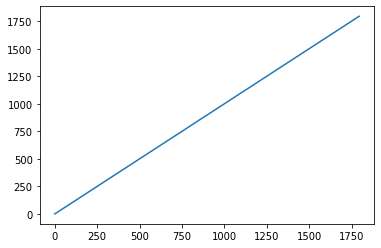

In [4]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [5]:
# bar_id is an uninfomative column -> delete it
cacao.drop(['bar_id'], inplace = True, axis = 1)

## company

In [6]:
# How many companies does the dataset contain
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
ChocoReko,1
Chocolats Privilege,1
Metropolitan,1
Chocolate Conspiracy,1


In [7]:
# Replace all '' (null srting) with None values in the company column
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [8]:
# Filter cmpanies 
n = 15
display(pd.DataFrame(cacao.company.value_counts()))
print(f"Значений, встретившихся в столбце более {n} раз:", (cacao.company.value_counts()>n).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Mayacama,1
ChocoReko,1
Chocolats Privilege,1
Metropolitan,1


Значений, встретившихся в столбце более 15 раз: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## specific_origin

In [9]:
# How many specific origins does the dataset contain
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
"Sambirano Valley, #215, MR, MC",1
"Chuao, #218, MR, MC",1
"Chuao, #217, DR, MC",1
"Jamaica, #204, DR, SC",1


In [12]:
# Replace all '' (null srting) with None values in the specific_origin column
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [14]:
# Filter specific_origin 
n = 10
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print(f"Значений, встретившихся в столбце более {n} раз:", (cacao.specific_origin.value_counts()>n).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Sambirano Valley, #215, MR, MC",1
"Chuao, #218, MR, MC",1
"Chuao, #217, DR, MC",1
"Jamaica, #204, DR, SC",1


Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## ref

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

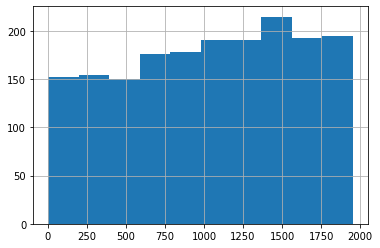

In [15]:
cacao.ref.hist()
cacao.ref.describe()

## review_date

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

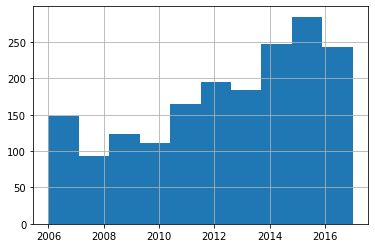

In [30]:
cacao.review_date.hist()
cacao.review_date.describe()
# 1.5*IQR = 7.5, Q1 - 1.5*IQR < min, Q3 + 1.5*IQR > max => there are no outliers

## cocoa_percent

In [31]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [32]:
# Converting '%' to float
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

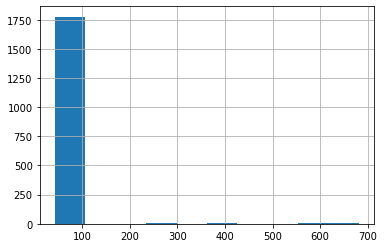

In [33]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

In [41]:
def check_outliers(df_column):
    IQR = df_column.quantile(0.75) - df_column.quantile(0.25)
    perc25 = df_column.quantile(0.25)
    perc75 = df_column.quantile(0.75)

    print(
    f'25-й перцентиль: {perc25},',
    f'75-й перцентиль: {perc75},',
    f"IQR: {IQR}, ",
    f"Границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}].")

    df_column.loc[df_column.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
        bins = 16, range = (40, 100), label = 'IQR')

    df_column.loc[df_column <= 100].hist(
        alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')

    plt.legend()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


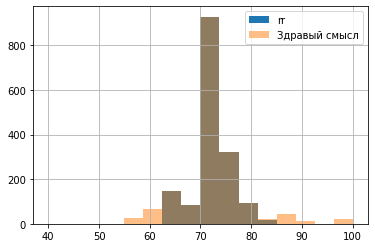

In [42]:
check_outliers(cacao.cocoa_percent)

In [43]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

## company_location

In [44]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [46]:
display(pd.DataFrame(cacao.company_location.value_counts()))
n = 10
print(f"Значений, встретившихся в столбце более {n} раз: {(cacao.company_location.value_counts()>10).sum()}")
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Ghana,1
India,1
Eucador,1
Martinique,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


## rating

In [47]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

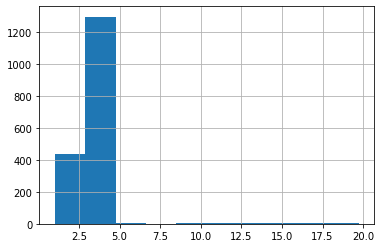

In [48]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


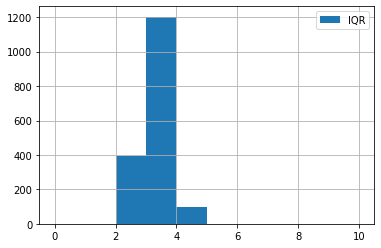

In [49]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [50]:
# Select extremely low and extremely high scores
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

## bean_type 

In [51]:
# Replace all '' (null srting) with None values in the bean_type column
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

n = 10
display(pd.DataFrame(cacao.bean_type.value_counts()))
print(f"Значений, встретившихся в столбце более {n} раз: {(cacao.bean_type.value_counts()>10).sum()}")
print(f"Уникальных значений: {cacao.bean_type.nunique()}")
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [52]:
# Replace all nan with None values in the bean_type column
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [64]:
n = 10 
display(pd.DataFrame(cacao.bean_type.value_counts()))
print(f"Значений, встретившихся в столбце более {n} раз: {(cacao.bean_type.value_counts()>10).sum()}")
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()


,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
Beniano,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


## broad_origin

In [65]:
n = 10 
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print(f"Значений, встретившихся в столбце более {n} раз: {(cacao.broad_origin.value_counts()>10).sum()}")
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Venez,Africa,Brasil,Peru,Mex",1
"Dominican Rep., Bali",1
"Ghana, Domin. Rep",1
"Trinidad, Ecuador",1


Значений, встретившихся в столбце более 10 раз: 26
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [66]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    
    if x == 'nan':
        return None
    
    if str(x).strip()=='':
        return x
    
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
    
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    x = x.replace('DominicanRepublic', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
    
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
    
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
    
    if 'Per' in x and 'Peru' not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')
    
    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
    
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    if ',' in x:
        x = x[:x.find(',')]
    
    return x


In [67]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [68]:
n = 10
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print(f'Значений, упомянутых более {n} раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,213
Ecuador,181
Peru,166
DomincanRepublic,162
Madagascar,140
...,...
Cameroon,1
Principe,1
Burma,1
Suriname,1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 60
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


## Correlation

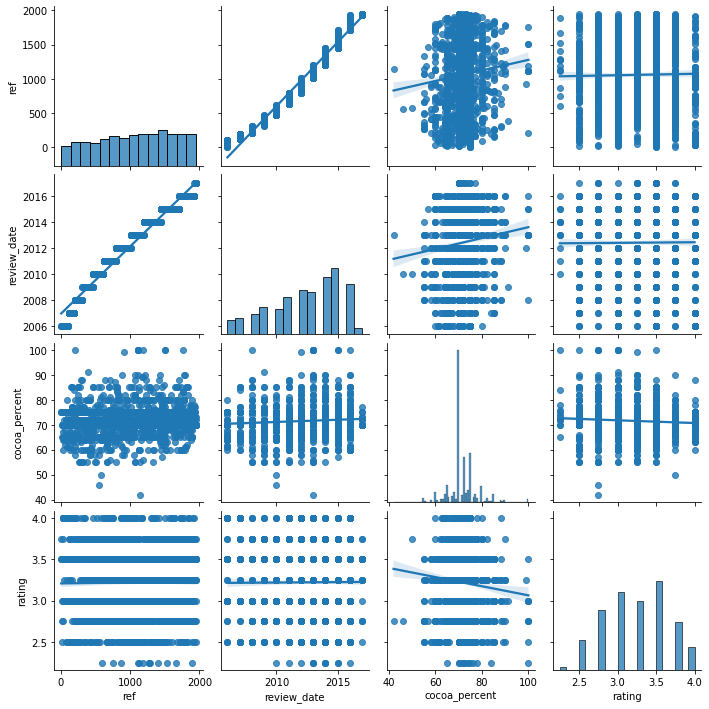

In [69]:
sns.pairplot(cacao, kind = 'reg')

In [70]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [71]:
# Delete the ref column since it is strongly correlated with review_date (they practically repeat each other)
cacao.drop(['ref'], inplace = True, axis = 1)

## Analysis of nominative variables

In [72]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

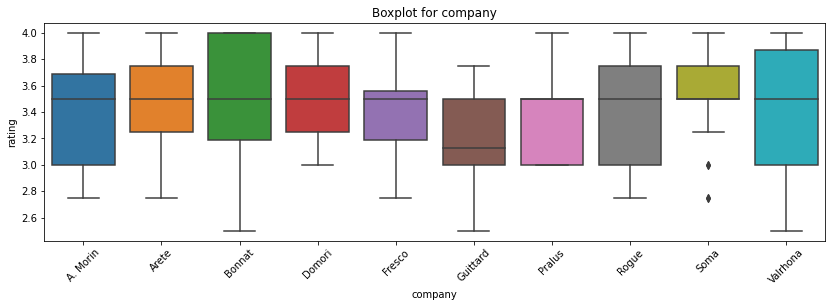

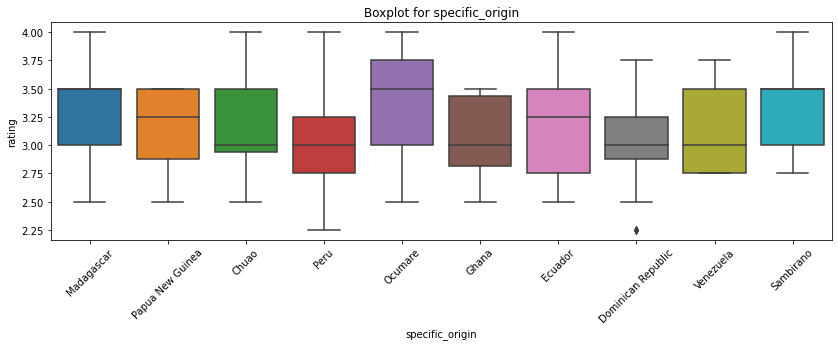

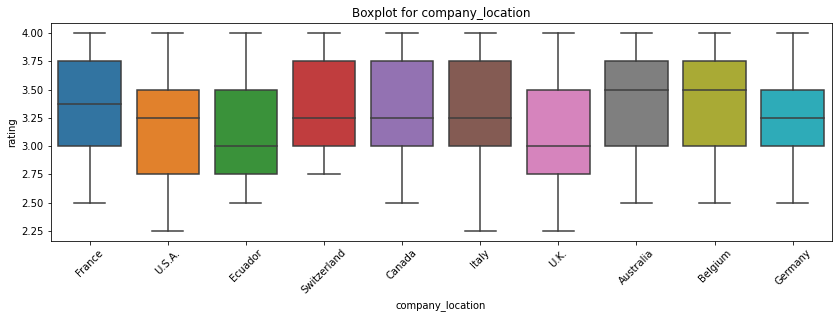

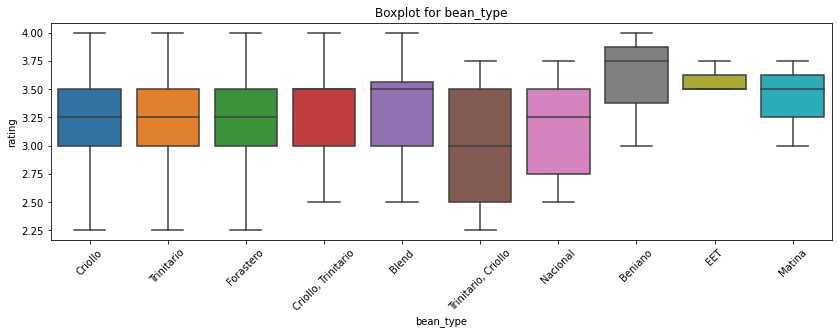

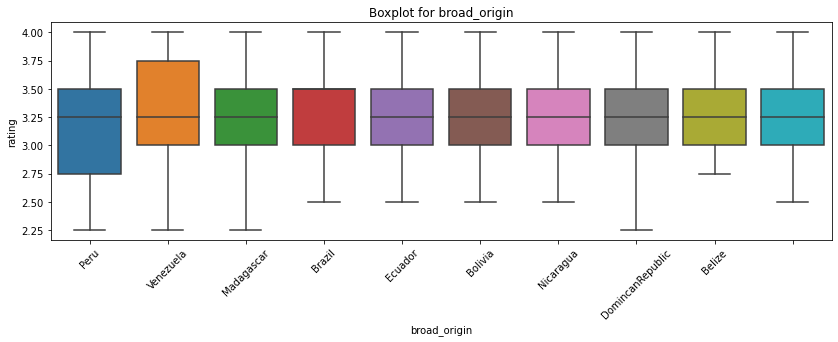

In [73]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

## Check H0
H0: the distribution of bar ratings by various parameters is indistinguishable

In [74]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [75]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [76]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0
